In [1]:
import sys
sys.path.append("..")
import torch
from torch import nn
from torchvision import transforms
from dataloaders.FashionMnist import load_FashionMnist
from models.MLP import MLP
from tools.model_trainer import train_model
from tools.model_tester import test_model


In [2]:
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1307,), (0.3081,))
])
train_iter, valid_iter, test_iter = load_FashionMnist(batch_size=batch_size, valid_split=0.2, transform=transform)
print(f"train size: {len(train_iter.dataset)}")
print(f"valid size: {len(valid_iter.dataset)}")
print(f"test size: {len(test_iter.dataset)}")

for X, y in test_iter:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


train size: 48000
valid size: 12000
test size: 10000
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


d:\Anaconda3\envs\lxh_torch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
net = MLP(hidden_num=100)
print(net)


Using cuda device
MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
train_model(net, train_iter, valid_iter, loss_fn, ['accuracy'], optimizer, num_epochs=1, device=device, use_tensorboard=False, use_animator=False, print_log=True, len_progress=15) 

training on cuda
Epoch 1/1
750/750 [===============] Train Loss: 0.3490, Train Accuracy: 0.8732, Valid Loss: 0.3592, Valid Accuracy: 0.8722, Cost Time 5.2625 sec
Train result
loss 0.3490
final train Accuracy 0.8732
final valid Accuracy 0.8722
9121.1492 examples/sec on cuda
5.2625 sec/epoch on cuda


100%|██████████| 5/5 [02:34<00:00, 30.90s/it]


Train result
loss 0.308
final train Accuracy 0.887
final valid Accuracy 0.869
10991.648 examples/sec on cuda
4.367 sec/epoch on cuda


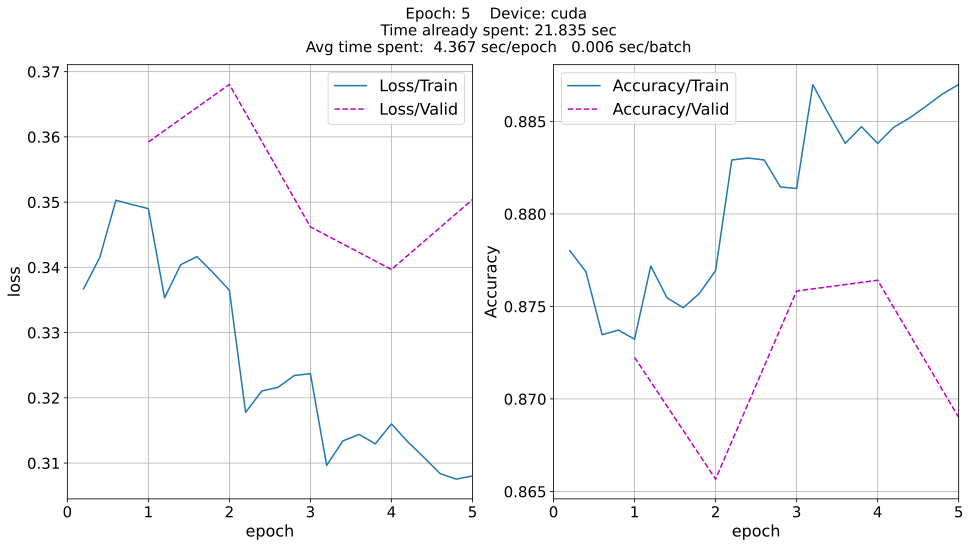

In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
train_model(net, train_iter, valid_iter, loss_fn, ['accuracy'], optimizer, num_epochs=5, device=device, use_tensorboard=True, use_animator=True) 


In [6]:
test_model(net, test_iter, loss_fn, ['accuracy'], device=device)

Test result
Number of instances: 10000
Number of batches: 156
Avg loss of each batch: 0.380694
Accuracy: 0.857
Time spent: 0.4755091667175293 sec
21030.089 examples/sec
0.003 sec/batch on cuda


(0.38069386092516094, [0.8569])